In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE

In [5]:
data = pd.read_csv('C:/Users/pallu/Desktop/Virtual Internship/week 4/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

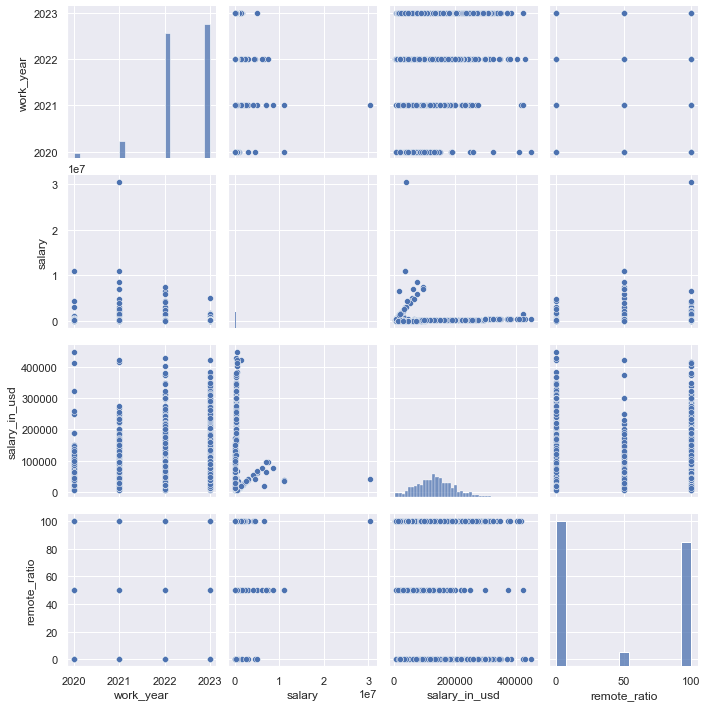

In [9]:
sns.pairplot(data)

<AxesSubplot:>

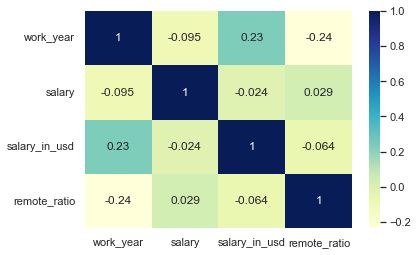

In [10]:
numeric_cols = data.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(),annot=True,cmap='YlGnBu')

In [11]:
data_dummified = pd.get_dummies(data=data, 
                                 columns=['employment_type','company_location','job_title','employee_residence']
                                 ,drop_first=True)

data_dummified.head(10) 
data_dummified.isna().sum()

work_year                0
experience_level         0
salary                   0
salary_currency          0
salary_in_usd            0
                        ..
employee_residence_TR    0
employee_residence_UA    0
employee_residence_US    0
employee_residence_UZ    0
employee_residence_VN    0
Length: 250, dtype: int64

In [12]:
print(data_dummified['experience_level'].unique())
print(data_dummified['company_size'].unique())

['SE' 'MI' 'EN' 'EX']
['L' 'S' 'M']


In [13]:
exp_mapping = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
size_mapping = {
    'L': 3,
    'M': 2,
    'S': 1
}

In [14]:
data_dummified['experience_level'] = data_dummified['experience_level'].map(exp_mapping)
data_dummified['company_size'] = data_dummified['company_size'].map(size_mapping)
data_dummified

,work_year,experience_level,salary,salary_currency,salary_in_usd,remote_ratio,company_size,employment_type_FL,employment_type_FT,employment_type_PT,...,employee_residence_SG,employee_residence_SI,employee_residence_SK,employee_residence_TH,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_UZ,employee_residence_VN
0,2023,3,80000,EUR,85847,100,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,2,30000,USD,30000,100,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2023,2,25500,USD,25500,100,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023,3,175000,USD,175000,100,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,3,120000,USD,120000,100,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,412000,USD,412000,100,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3751,2021,2,151000,USD,151000,100,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3752,2020,1,105000,USD,105000,100,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3753,2020,1,100000,USD,100000,100,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
print(data_dummified.columns)

Index(['work_year', 'experience_level', 'salary', 'salary_currency',
       'salary_in_usd', 'remote_ratio', 'company_size', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT',
       ...
       'employee_residence_SG', 'employee_residence_SI',
       'employee_residence_SK', 'employee_residence_TH',
       'employee_residence_TN', 'employee_residence_TR',
       'employee_residence_UA', 'employee_residence_US',
       'employee_residence_UZ', 'employee_residence_VN'],
      dtype='object', length=250)


In [23]:
X = data_dummified[['work_year', 'experience_level', 'remote_ratio', 'company_size']]
#X = data_dummified.drop(columns=['salary_in_usd','salary','salary_currency'])
y = data_dummified['salary_in_usd']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=35)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Define the regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

regressors = [

    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    
]

# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# Iterate over each regressor
for reg_name, reg in regressors:
        steps = [('MinMax',StandardScaler()),('Regressor', reg)]
        pipeline = Pipeline(steps)
    
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

    # Calculate the evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = metrics.r2_score(y_test, y_pred)

        new_row = {
        'Model': reg_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
        }
        metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

# Sort the metrics DataFrame by RMSE and R2 Score in ascending order
sorted_metrics_df = metrics_df.sort_values(by=['RMSE', 'R2 Score'], ascending=[True, False])

print(sorted_metrics_df)

               Model           MAE                MSE          RMSE  R2 Score
1  Gradient Boosting  44123.797954  3234642936.282585  56873.921408  0.252771
0      Random Forest  44600.846703  3306069085.341588  57498.426808  0.236271
3      Decision Tree  44790.385398   3397714296.68983  58289.915909    0.2151
2                KNN  49674.538445  3921814064.956081  62624.388739  0.094029


In [26]:
mymodel = DecisionTreeRegressor()
mymodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
import pickle

# Assuming the model is stored in the 'model' variable
with open('mymodel.pkl', 'wb') as f:
    pickle.dump(mymodel, f)

In [29]:
mymodel.predict([['2021', '3', '55', '350']])

C:\Users\pallu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([94544.81818182])